In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-dataset/CarPrice_Assignment.csv


# Problem Statement:
The Chinese automaker Geely Auto intends to establish its manufacturing plant in the US to produce cars locally, with the goal of competing with US and European automakers. To achieve this objective, they have enlisted the services of an automobile consulting firm to investigate the factors that determine car pricing. Specifically, they seek to understand the variables that impact car pricing in the American market, which may differ significantly from the Chinese market. The consulting company aims to identify:

* The critical variables that affect car pricing
* How accurately these variables can predict car pricing.

# Goal
* Our task is to create a model that can predict the prices of cars based on various independent variables. 
* The purpose of this model is to help the management gain insights into how the prices of cars are affected by different factors, such as design, business strategy, and market conditions. 
* By understanding these pricing dynamics, the management can adjust their strategies to meet specific price targets and better navigate a new market.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# # import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
# import matplotlib.ticker as ticker
# import matplotlib.ticker as plticker

In [4]:
df = pd.read_csv(r'../input/car-price-dataset/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


### Explore the dataset

In [5]:
df.shape

(205, 26)

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.dtypes

car_ID              int64  
symboling           int64  
CarName             object 
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
dtype: object

### Clean the Data

In [10]:
df.isna().sum().sort_values(ascending = True) #no null values

car_ID              0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
enginetype          0
curbweight          0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
CarName             0
symboling           0
highwaympg          0
price               0
dtype: int64

In [11]:
df.drop(columns=['car_ID'], inplace = True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [12]:
df['CarName_m'] = df['CarName'].str.extract('^([\w\-]+)') # extract the first word

In [13]:
df['CarName_m'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen     9 
dodge          9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
isuzu          4 
porsche        4 
alfa-romero    3 
chevrolet      3 
jaguar         3 
vw             2 
maxda          2 
renault        2 
toyouta        1 
vokswagen      1 
Nissan         1 
mercury        1 
porcshce       1 
Name: CarName_m, dtype: int64

In [14]:
df['CarName_m'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Typo Error in Car Company names
* alfa-romero = alfa
* maxda = mazda
* Nissan = nissan
* porsche = porcshce
* toyota = toyouta
* vokswagen = volkswagen = vw

In [15]:
df['CarName_m'] = df['CarName_m'].replace({'alfa-romero' : 'alfa','maxda' : 'mazda','Nissan' : 'nissan','porsche' : 'porcshce','toyota' : 'toyouta','vokswagen': 'volkswagen', 'vw' : 'volkswagen'})
df['CarName_m'].value_counts()

toyouta       32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge         9 
buick         8 
bmw           8 
audi          7 
plymouth      7 
saab          6 
porcshce      5 
isuzu         4 
jaguar        3 
chevrolet     3 
alfa          3 
renault       2 
mercury       1 
Name: CarName_m, dtype: int64

In [16]:
df['CarName_m'].value_counts().index

Index(['toyouta', 'nissan', 'mazda', 'mitsubishi', 'honda', 'volkswagen',
       'subaru', 'peugeot', 'volvo', 'dodge', 'buick', 'bmw', 'audi',
       'plymouth', 'saab', 'porcshce', 'isuzu', 'jaguar', 'chevrolet', 'alfa',
       'renault', 'mercury'],
      dtype='object')

In [17]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_m
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi


In [18]:
df.drop(columns = ['CarName'], inplace = True) 

In [19]:
# change the datatype of symboling as it is categorical variable as per dictionary file

df['symboling'] = df['symboling'].astype(str)

In [20]:
# check for duplicates

df.drop_duplicates()
df[df.duplicated()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_m


In [21]:
# Store Numerical and Categorical Variables Seperately
cat_variables = df.select_dtypes(include = 'object').columns
num_variables = df.select_dtypes(exclude = 'object').columns
print('Categorical Variables', cat_variables.values, sep = '\n', end = '\n\n')
print('Numerical Variables', num_variables.values, sep = '\n')

Categorical Variables
['symboling' 'fueltype' 'aspiration' 'doornumber' 'carbody' 'drivewheel'
 'enginelocation' 'enginetype' 'cylindernumber' 'fuelsystem' 'CarName_m']

Numerical Variables
['wheelbase' 'carlength' 'carwidth' 'carheight' 'curbweight' 'enginesize'
 'boreratio' 'stroke' 'compressionratio' 'horsepower' 'peakrpm' 'citympg'
 'highwaympg' 'price']


### Data Visualization

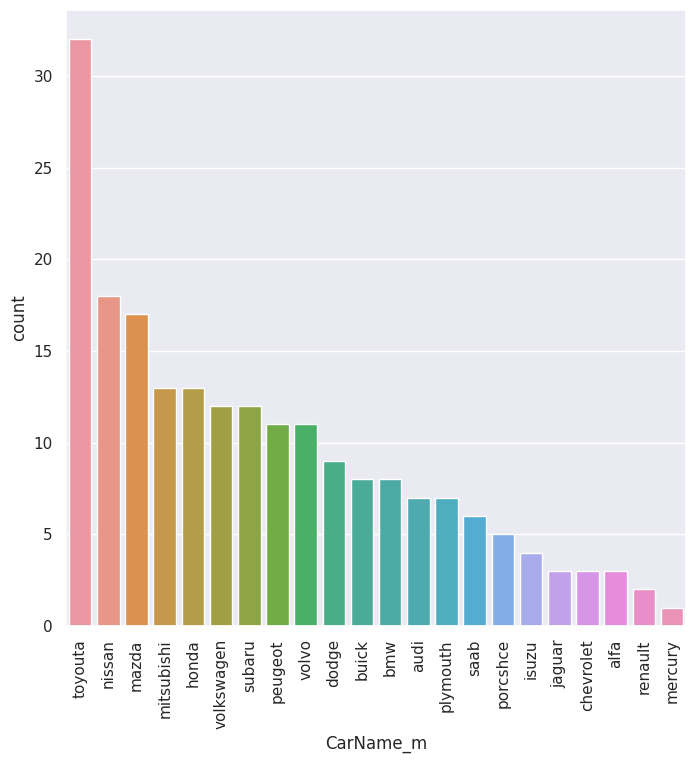

In [22]:
sort_order = ['toyouta', 'nissan', 'mazda', 'mitsubishi', 'honda', 'volkswagen',
       'subaru', 'peugeot', 'volvo', 'dodge', 'buick', 'bmw', 'audi',
       'plymouth', 'saab', 'porcshce', 'isuzu', 'jaguar', 'chevrolet', 'alfa',
       'renault', 'mercury']
ax = sns.countplot(data = df, x = 'CarName_m', order = sort_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()



##### Insights:
* Toyota seems to be the most favoured cars.
* Mercury seems to be the least favoured cars.

#### Visualising Target Variable 

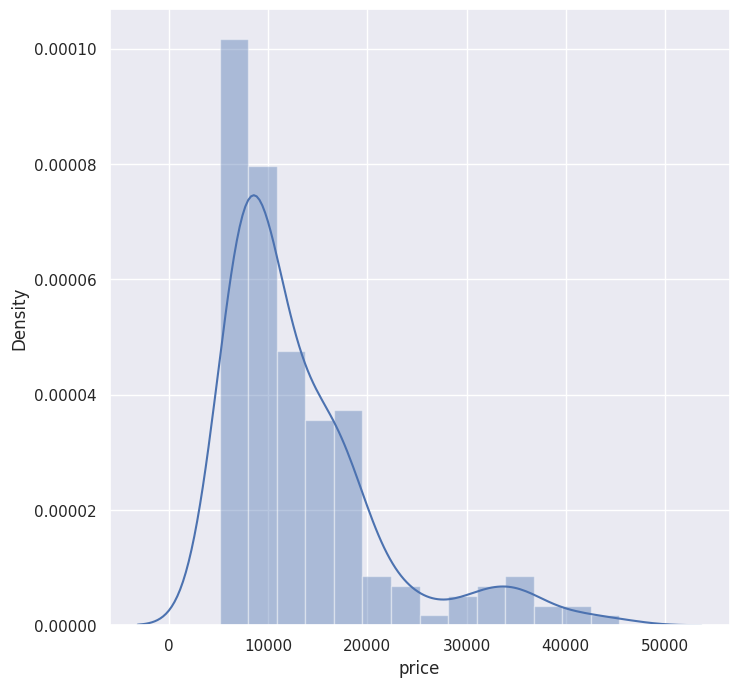

In [23]:
sns.distplot(df['price'])
plt.show()

In [24]:
print("Kurtosis:", df['price'].kurt())
print('Skewness:', df['price'].skew())
print("Mean:", df['price'].mean())

Kurtosis: 3.051647871396399
Skewness: 1.7776781560914454
Mean: 13276.710570731706


##### Inference
* More number of cars has cost less than 13276.

#### Visualising Numeric Variables

In [25]:
# sns.pairplot(df[num_variables])
plt.show()

In [26]:
df[num_variables].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.0000,0.8746,0.7951,0.5894,0.7764,0.5693,0.4887,0.1610,0.2498,0.3533,-0.3605,-0.4704,-0.5441,0.5778
carlength,0.8746,1.0000,0.8411,0.4910,0.8777,0.6834,0.6065,0.1295,0.1584,0.5526,-0.2872,-0.6709,-0.7047,0.6829
carwidth,0.7951,0.8411,1.0000,0.2792,0.8670,0.7354,0.5591,0.1829,0.1811,0.6407,-0.2200,-0.6427,-0.6772,0.7593
carheight,0.5894,0.4910,0.2792,1.0000,0.2956,0.0671,0.1711,-0.0553,0.2612,-0.1088,-0.3204,-0.0486,-0.1074,0.1193
curbweight,0.7764,0.8777,0.8670,0.2956,1.0000,0.8506,0.6485,0.1688,0.1514,0.7507,-0.2662,-0.7574,-0.7975,0.8353
enginesize,0.5693,0.6834,0.7354,0.0671,0.8506,1.0000,0.5838,0.2031,0.0290,0.8098,-0.2447,-0.6537,-0.6775,0.8741
boreratio,0.4887,0.6065,0.5591,0.1711,0.6485,0.5838,1.0000,-0.0559,0.0052,0.5737,-0.2550,-0.5845,-0.5870,0.5532
stroke,0.1610,0.1295,0.1829,-0.0553,0.1688,0.2031,-0.0559,1.0000,0.1861,0.0809,-0.0680,-0.0421,-0.0439,0.0794
compressionratio,0.2498,0.1584,0.1811,0.2612,0.1514,0.0290,0.0052,0.1861,1.0000,-0.2043,-0.4357,0.3247,0.2652,0.0680
horsepower,0.3533,0.5526,0.6407,-0.1088,0.7507,0.8098,0.5737,0.0809,-0.2043,1.0000,0.1311,-0.8015,-0.7705,0.8081


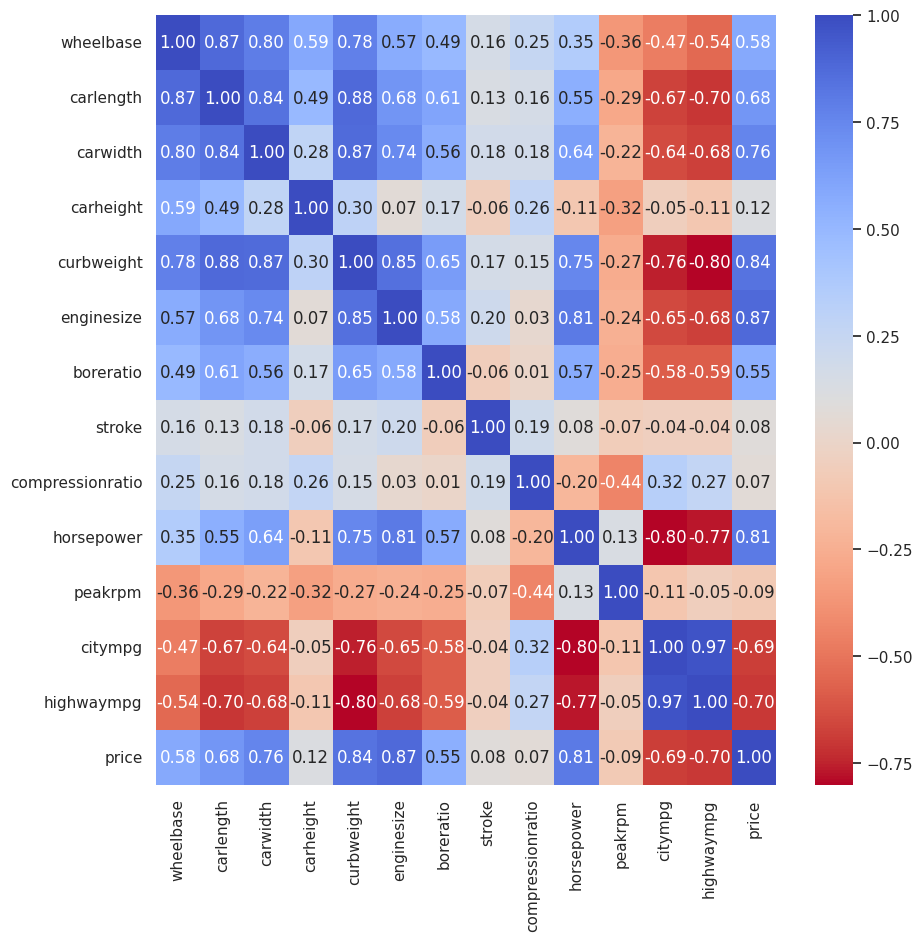

In [27]:
plt.figure(figsize = (10, 10))
sns.heatmap(df[num_variables].corr(), annot = True,fmt = '.2f', cmap='coolwarm_r')
plt.show()

#### Inferences
* enginesize, curbweight, horsepower, carwidth, carlength are top positively correlated features to the target variable.
* highwaympg, citympg are top negatively correlated features to the target variable.
* <b>Multicollinearity</b> exists in the datase.
 

In [28]:
target_pos_corr_features_dict = {}
target_neg_corr_features_dict = {}

for i in (df.corr()['price'].index):
    if abs(df.corr()['price'][i])>0.5:
        if df.corr()['price'][i]>0:
            target_pos_corr_features_dict[i] = df.corr()['price'][i]
        else:
            target_neg_corr_features_dict[i] = df.corr()['price'][i]        
        print(i, ':', df.corr()['price'][i])

wheelbase : 0.5778155982921489
carlength : 0.6829200156779629
carwidth : 0.759325299741511
curbweight : 0.8353048793372975
enginesize : 0.8741448025245117
boreratio : 0.5531732367984439
horsepower : 0.8081388225362214
citympg : -0.68575133602704
highwaympg : -0.6975990916465573
price : 1.0


In [29]:
target_pos_corr_features_dict

{'wheelbase': 0.5778155982921489,
 'carlength': 0.6829200156779629,
 'carwidth': 0.759325299741511,
 'curbweight': 0.8353048793372975,
 'enginesize': 0.8741448025245117,
 'boreratio': 0.5531732367984439,
 'horsepower': 0.8081388225362214,
 'price': 1.0}

In [30]:
target_neg_corr_features_dict

{'citympg': -0.68575133602704, 'highwaympg': -0.6975990916465573}

In [31]:
cat_variables

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'CarName_m'],
      dtype='object')

### Visualising Categorical Variables

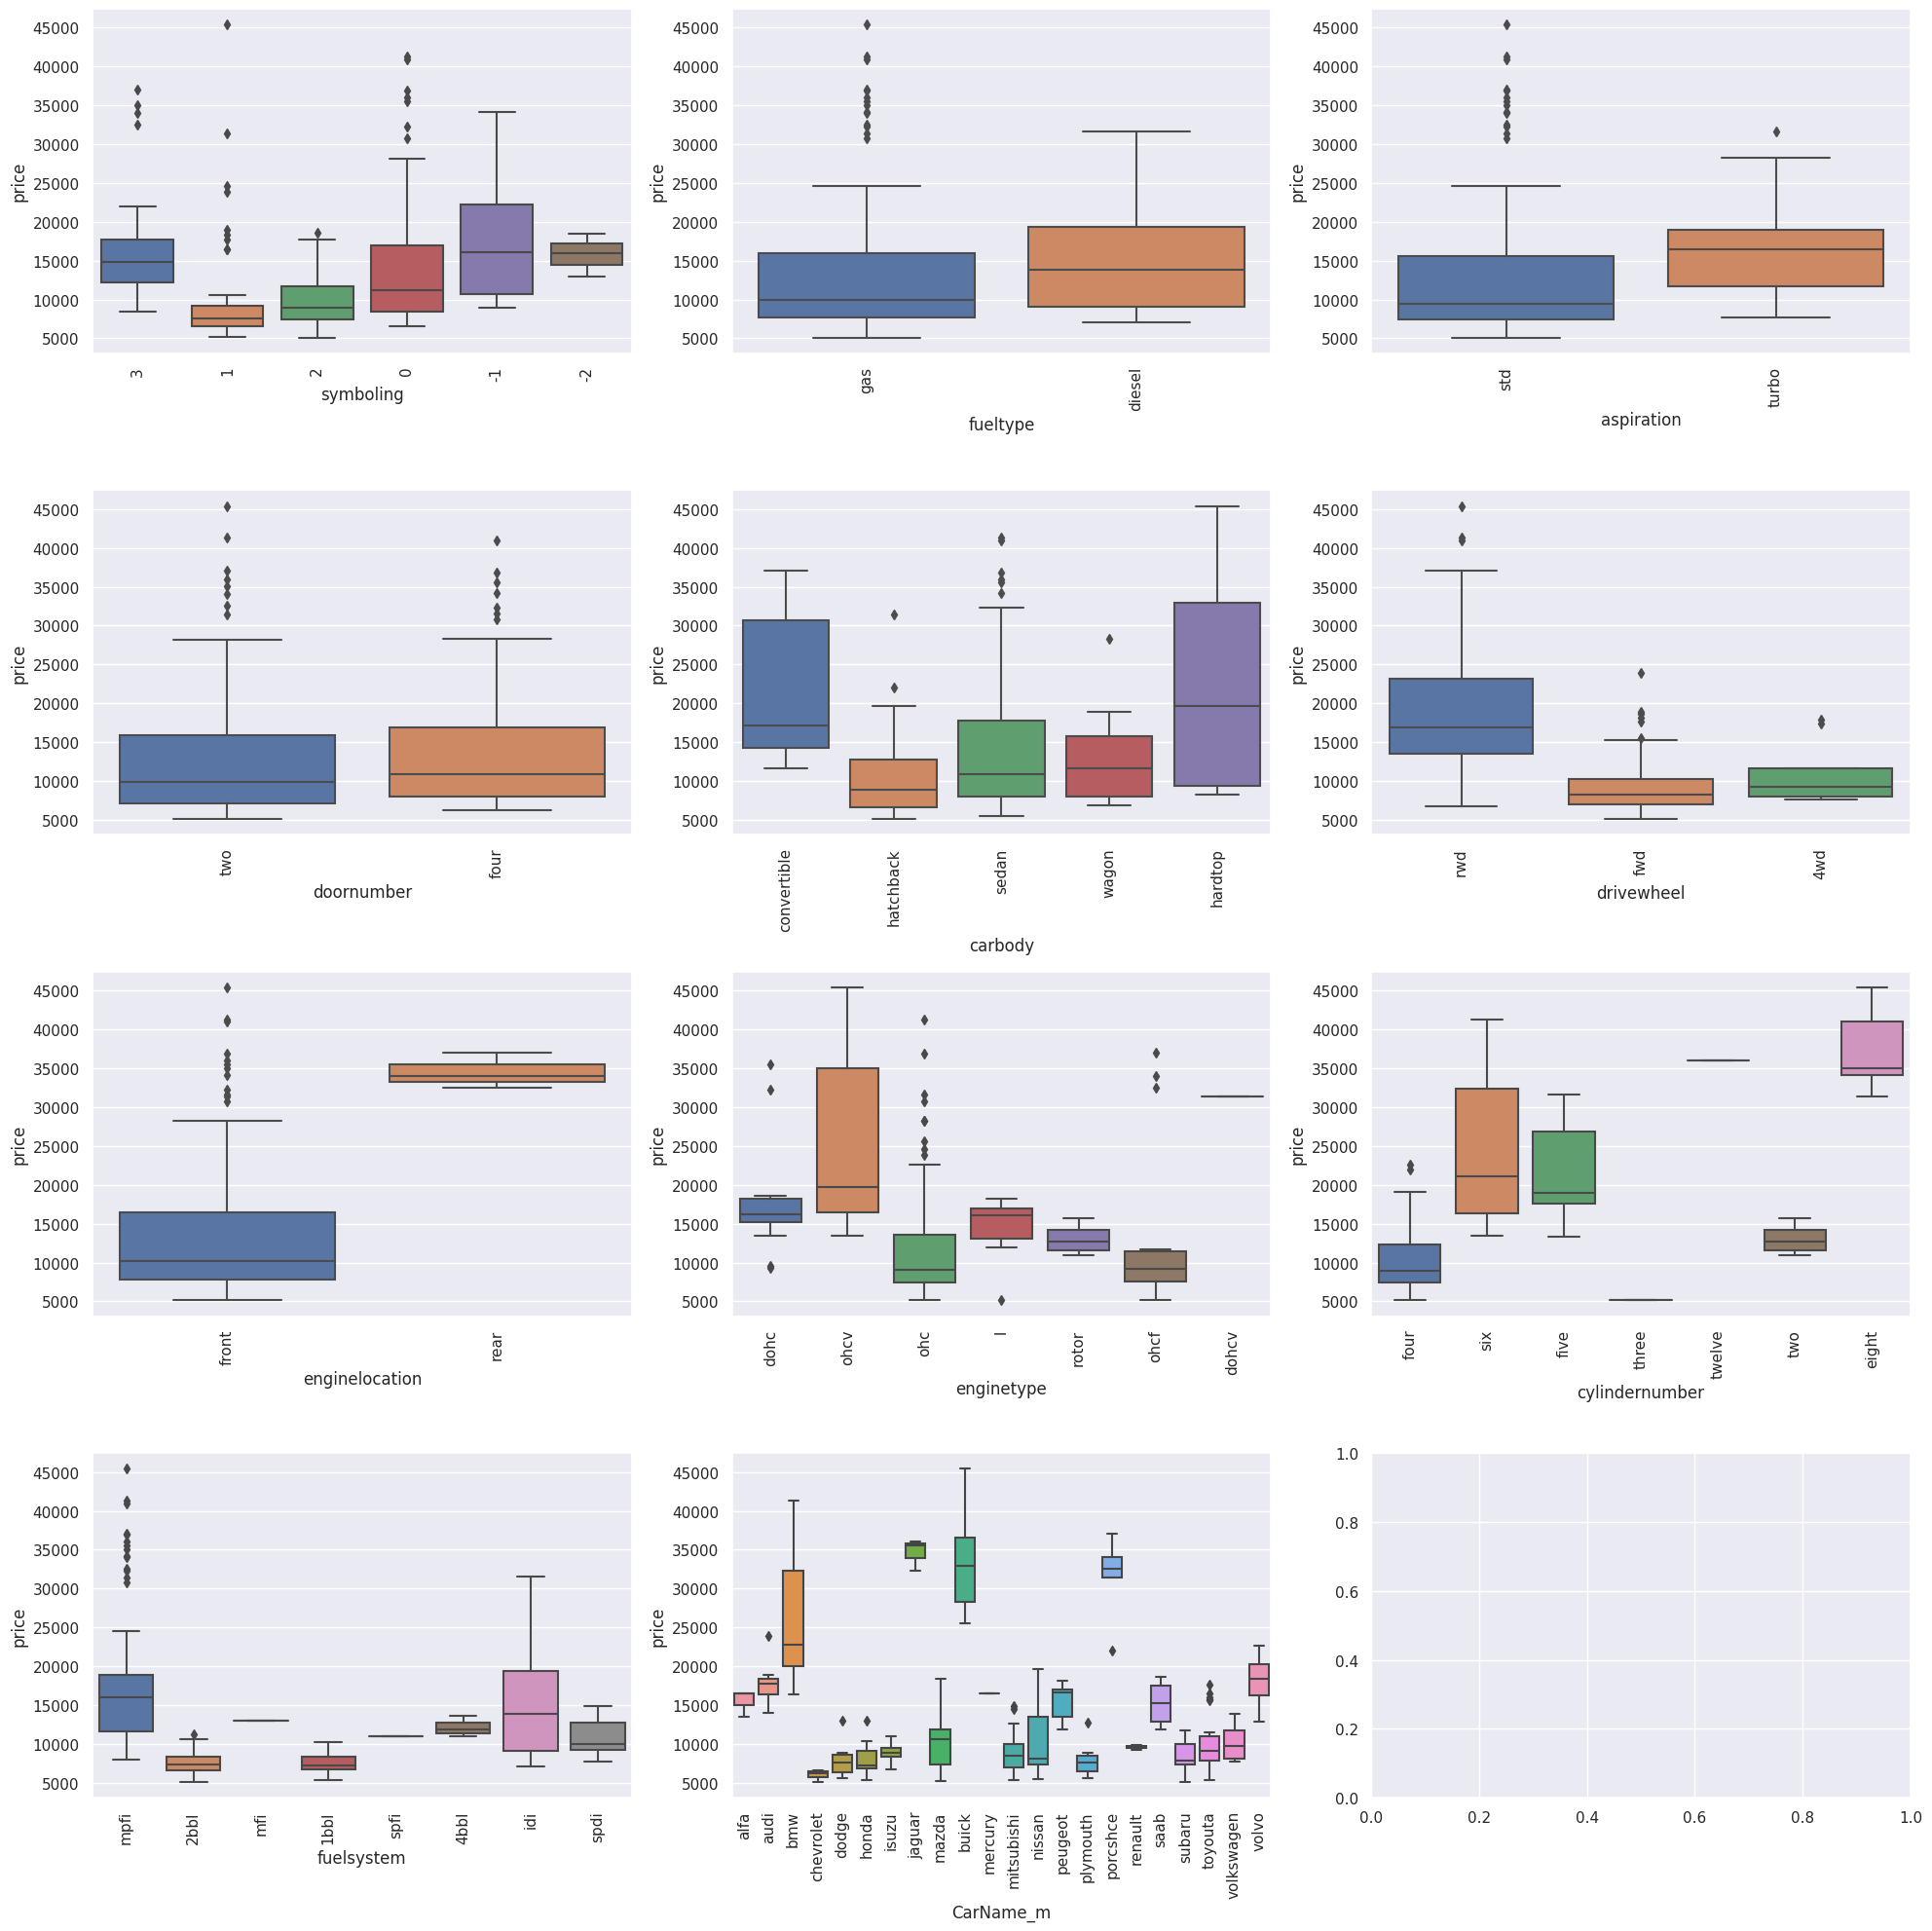

In [32]:
# We will use boxplots to have a better understanding of the distribution of price with these features

fig, ax = plt.subplots(4,3, figsize=(20,20))
for i in range(4):
    for j in range(3):
        if (i)*3 + j>=len(cat_variables):
            continue
        sns.boxplot(data = df, x = cat_variables[(i)*3 + j], y = 'price', ax = ax[(i,j)])
        ax[(i,j)].set_xticklabels(ax[(i,j)].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#### Insights
* The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
* All the types of carbody is relatively cheaper as compared to convertible carbody.
* The cars with rear enginelocation are way expensive than cars with front enginelocation.
* The price of car is directly proportional to no. of cylinders in most cases.
* Enginetype ohcv comes into higher price range cars.
* DoorNumber isn't affecting the price much.
* HigerEnd cars seems to have rwd drivewheel

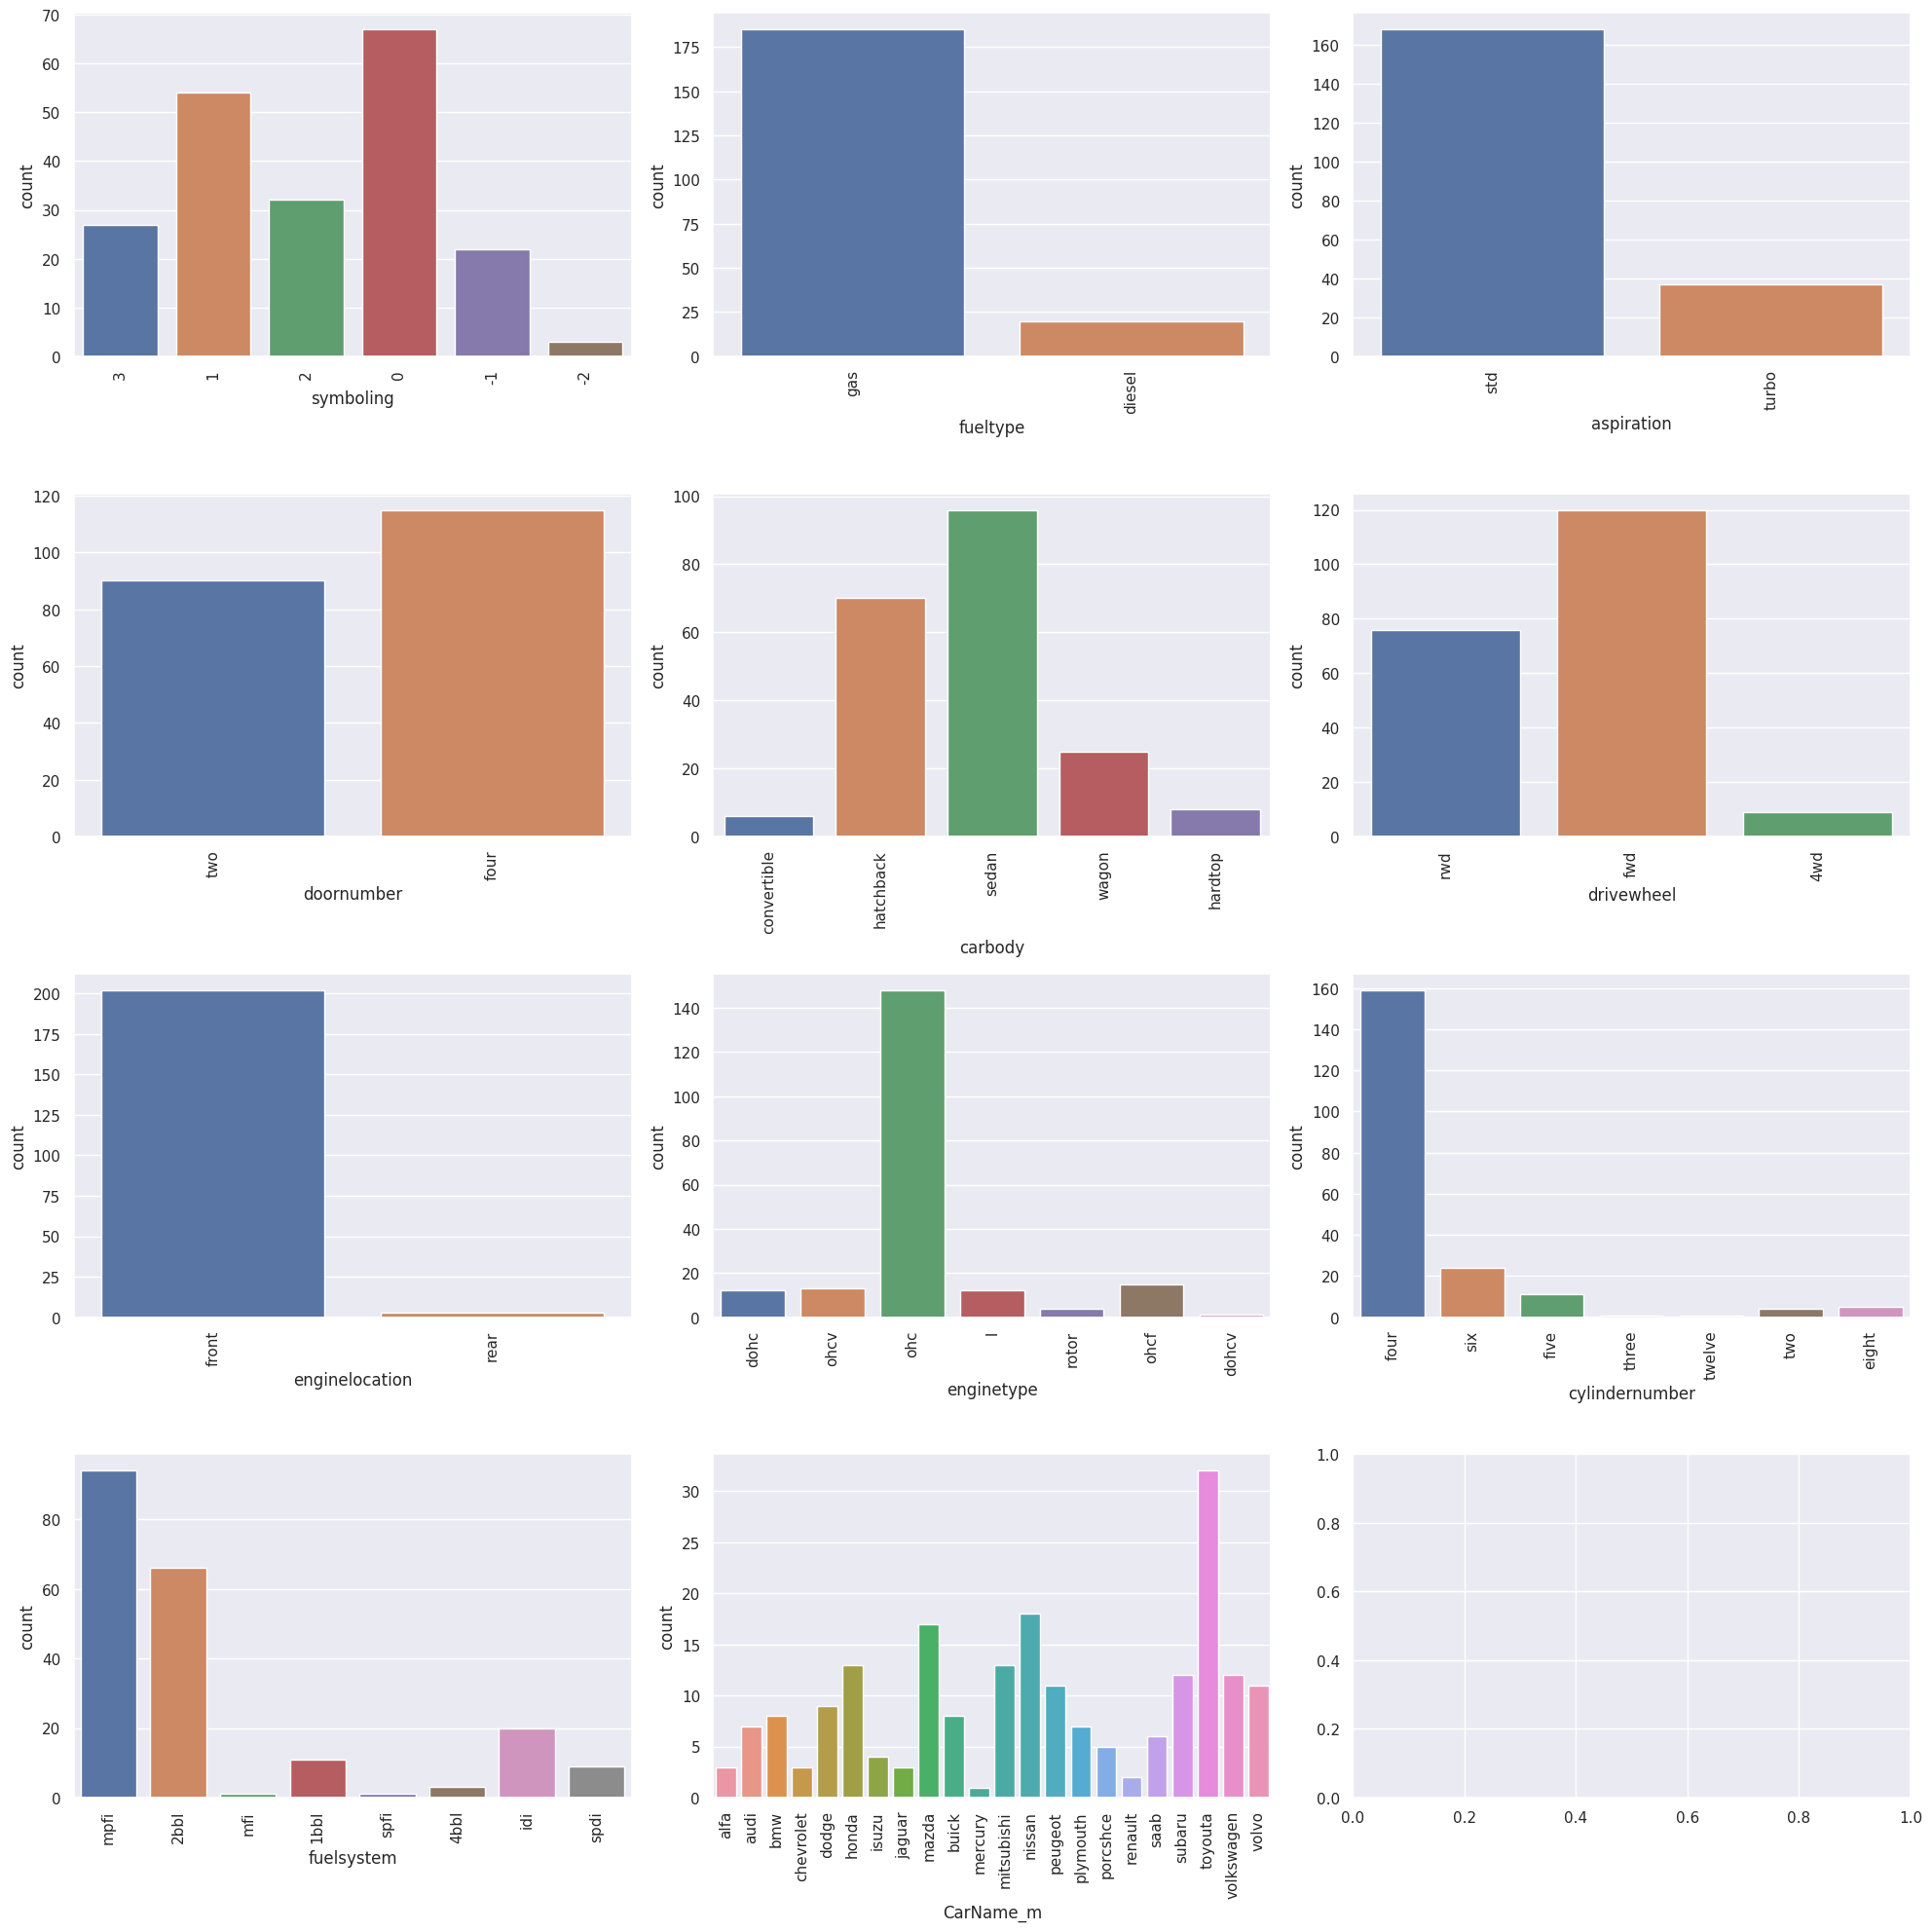

In [33]:
fig, ax = plt.subplots(4,3, figsize=(20,20))
for i in range(4):
    for j in range(3):
        if (i)*3 + j>=len(cat_variables):
            continue
        sns.countplot(data = df, x = cat_variables[(i)*3 + j], ax = ax[(i,j)])
        ax[(i,j)].set_xticklabels(ax[(i,j)].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#### Insights
* Many of the cars have fueltype as diesel.
* Most of cars contains four cylinders.
* Sedan is the most preferred car.
* Most people purchasing toyato campared to other brands.

#### Derived Metrices

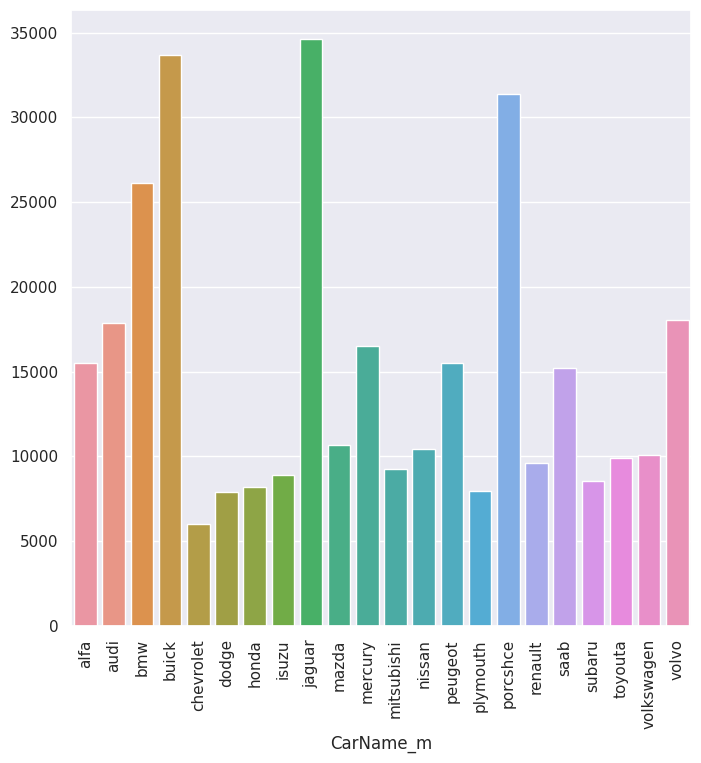

In [34]:
# Average Price
ax = sns.barplot(df[['CarName_m', 'price']].groupby(by = 'CarName_m').agg('mean').T)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

#### Insights
* Jaguar, buick, porcshce seems to have highest average price.
* Chevrolet is the cheapest brand among others.

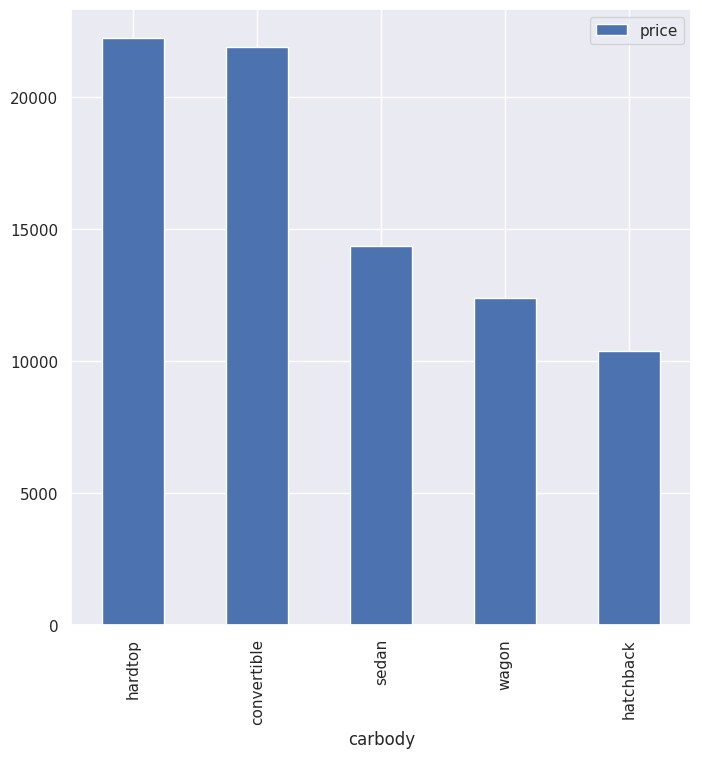

In [35]:
df[['carbody', 'price']].groupby('carbody').mean().sort_values(by = 'price', ascending = False).plot.bar()
plt.show()

#### Insights
* hardtop, convertible cartypes are expensive. while hatchback is the cheapest.

In [36]:
#Binning the Car Companies based on avg prices of each car Company.

df['price'] = df['price'].astype('int')
df_temp = df.copy()
df_temp.groupby(['CarName_m'])['price'].mean()

CarName_m
alfa         15498.3333
audi         17859.1429
bmw          26118.7500
buick        33647.0000
chevrolet    6007.0000 
dodge        7875.4444 
honda        8184.6923 
isuzu        8916.2500 
jaguar       34600.0000
mazda        10652.8824
mercury      16503.0000
mitsubishi   9239.7692 
nissan       10415.6667
peugeot      15489.0909
plymouth     7963.4286 
porcshce     31400.4000
renault      9595.0000 
saab         15223.3333
subaru       8541.2500 
toyouta      9885.8125 
volkswagen   10077.5000
volvo        18063.1818
Name: price, dtype: float64

In [37]:
t = df_temp.groupby(['CarName_m'])['price'].mean().reset_index()
t.columns=['CarName_m', 'avg_price']
t.head()

,CarName_m,avg_price
0,alfa,15498.3333
1,audi,17859.1429
2,bmw,26118.7500
3,buick,33647.0000
4,chevrolet,6007.0000


In [38]:
df_temp = df_temp.merge ( t, how = 'left', on = 'CarName_m')

In [39]:
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_temp['avg_price'],bins,right=False,labels=label)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_m,Cars_Category
0,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,alfa,Medium_Range
1,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,alfa,Medium_Range
2,1,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,alfa,Medium_Range
3,2,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,audi,Medium_Range
4,2,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,audi,Medium_Range


In [40]:
len(df.columns)

26

In [41]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']
df=df[sig_col]
df.head()

,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000
1,16500,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000
2,16500,Medium_Range,ohcv,gas,std,hatchback,six,rwd,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000
3,13950,Medium_Range,ohc,gas,std,sedan,four,fwd,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000
4,17450,Medium_Range,ohc,gas,std,sedan,five,4wd,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000


### Data Preparation
* The variable carbody has five levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.
* For this, we will use something called dummy variables

In [42]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']
dummies = pd.get_dummies(df[sig_cat_col], drop_first = True)
df = pd.concat([df, dummies], axis = 1)

In [43]:
df.drop(columns = sig_cat_col, inplace = True)
df.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [44]:
df.shape

(205, 32)

### Splitting the Data into Training and Testing Sets

In [45]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
X

,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1000,2952,141,3.7800,114,23,28,188.8000,68.9000,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
201,109.1000,3049,141,3.7800,160,19,25,188.8000,68.8000,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
202,109.1000,3012,173,3.5800,134,18,23,188.8000,68.9000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
203,109.1000,3217,145,3.0100,106,26,27,188.8000,68.9000,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


#### Feature Rescaling
* It is extremely important to rescale the variables so that they have a comparable scale. 
* If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 

There are two common ways of rescaling:
* Min-Max scaling
* Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [47]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']
X_train[sig_num_col] = sts.fit_transform(X_train[sig_num_col])
X_test[sig_num_col] = sts.transform(X_test[sig_num_col])
df[sig_num_col] = sts.transform(df[sig_num_col])
df.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,-1.7058,-0.0628,0.0641,0.5420,0.1275,-0.6323,-0.5215,-0.4950,-0.8669,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,-1.7058,-0.0628,0.0641,0.5420,0.1275,-0.6323,-0.5215,-0.4950,-0.8669,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500,-0.7328,0.4615,0.5902,-2.3851,1.1932,-0.9694,-0.6810,-0.3003,-0.2298,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950,0.1413,-0.4650,-0.4382,-0.4955,-0.0955,-0.1267,-0.0431,0.1380,0.0887,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450,0.0754,0.4634,0.2076,-0.4955,0.2267,-1.1379,-1.3189,0.1380,0.1797,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


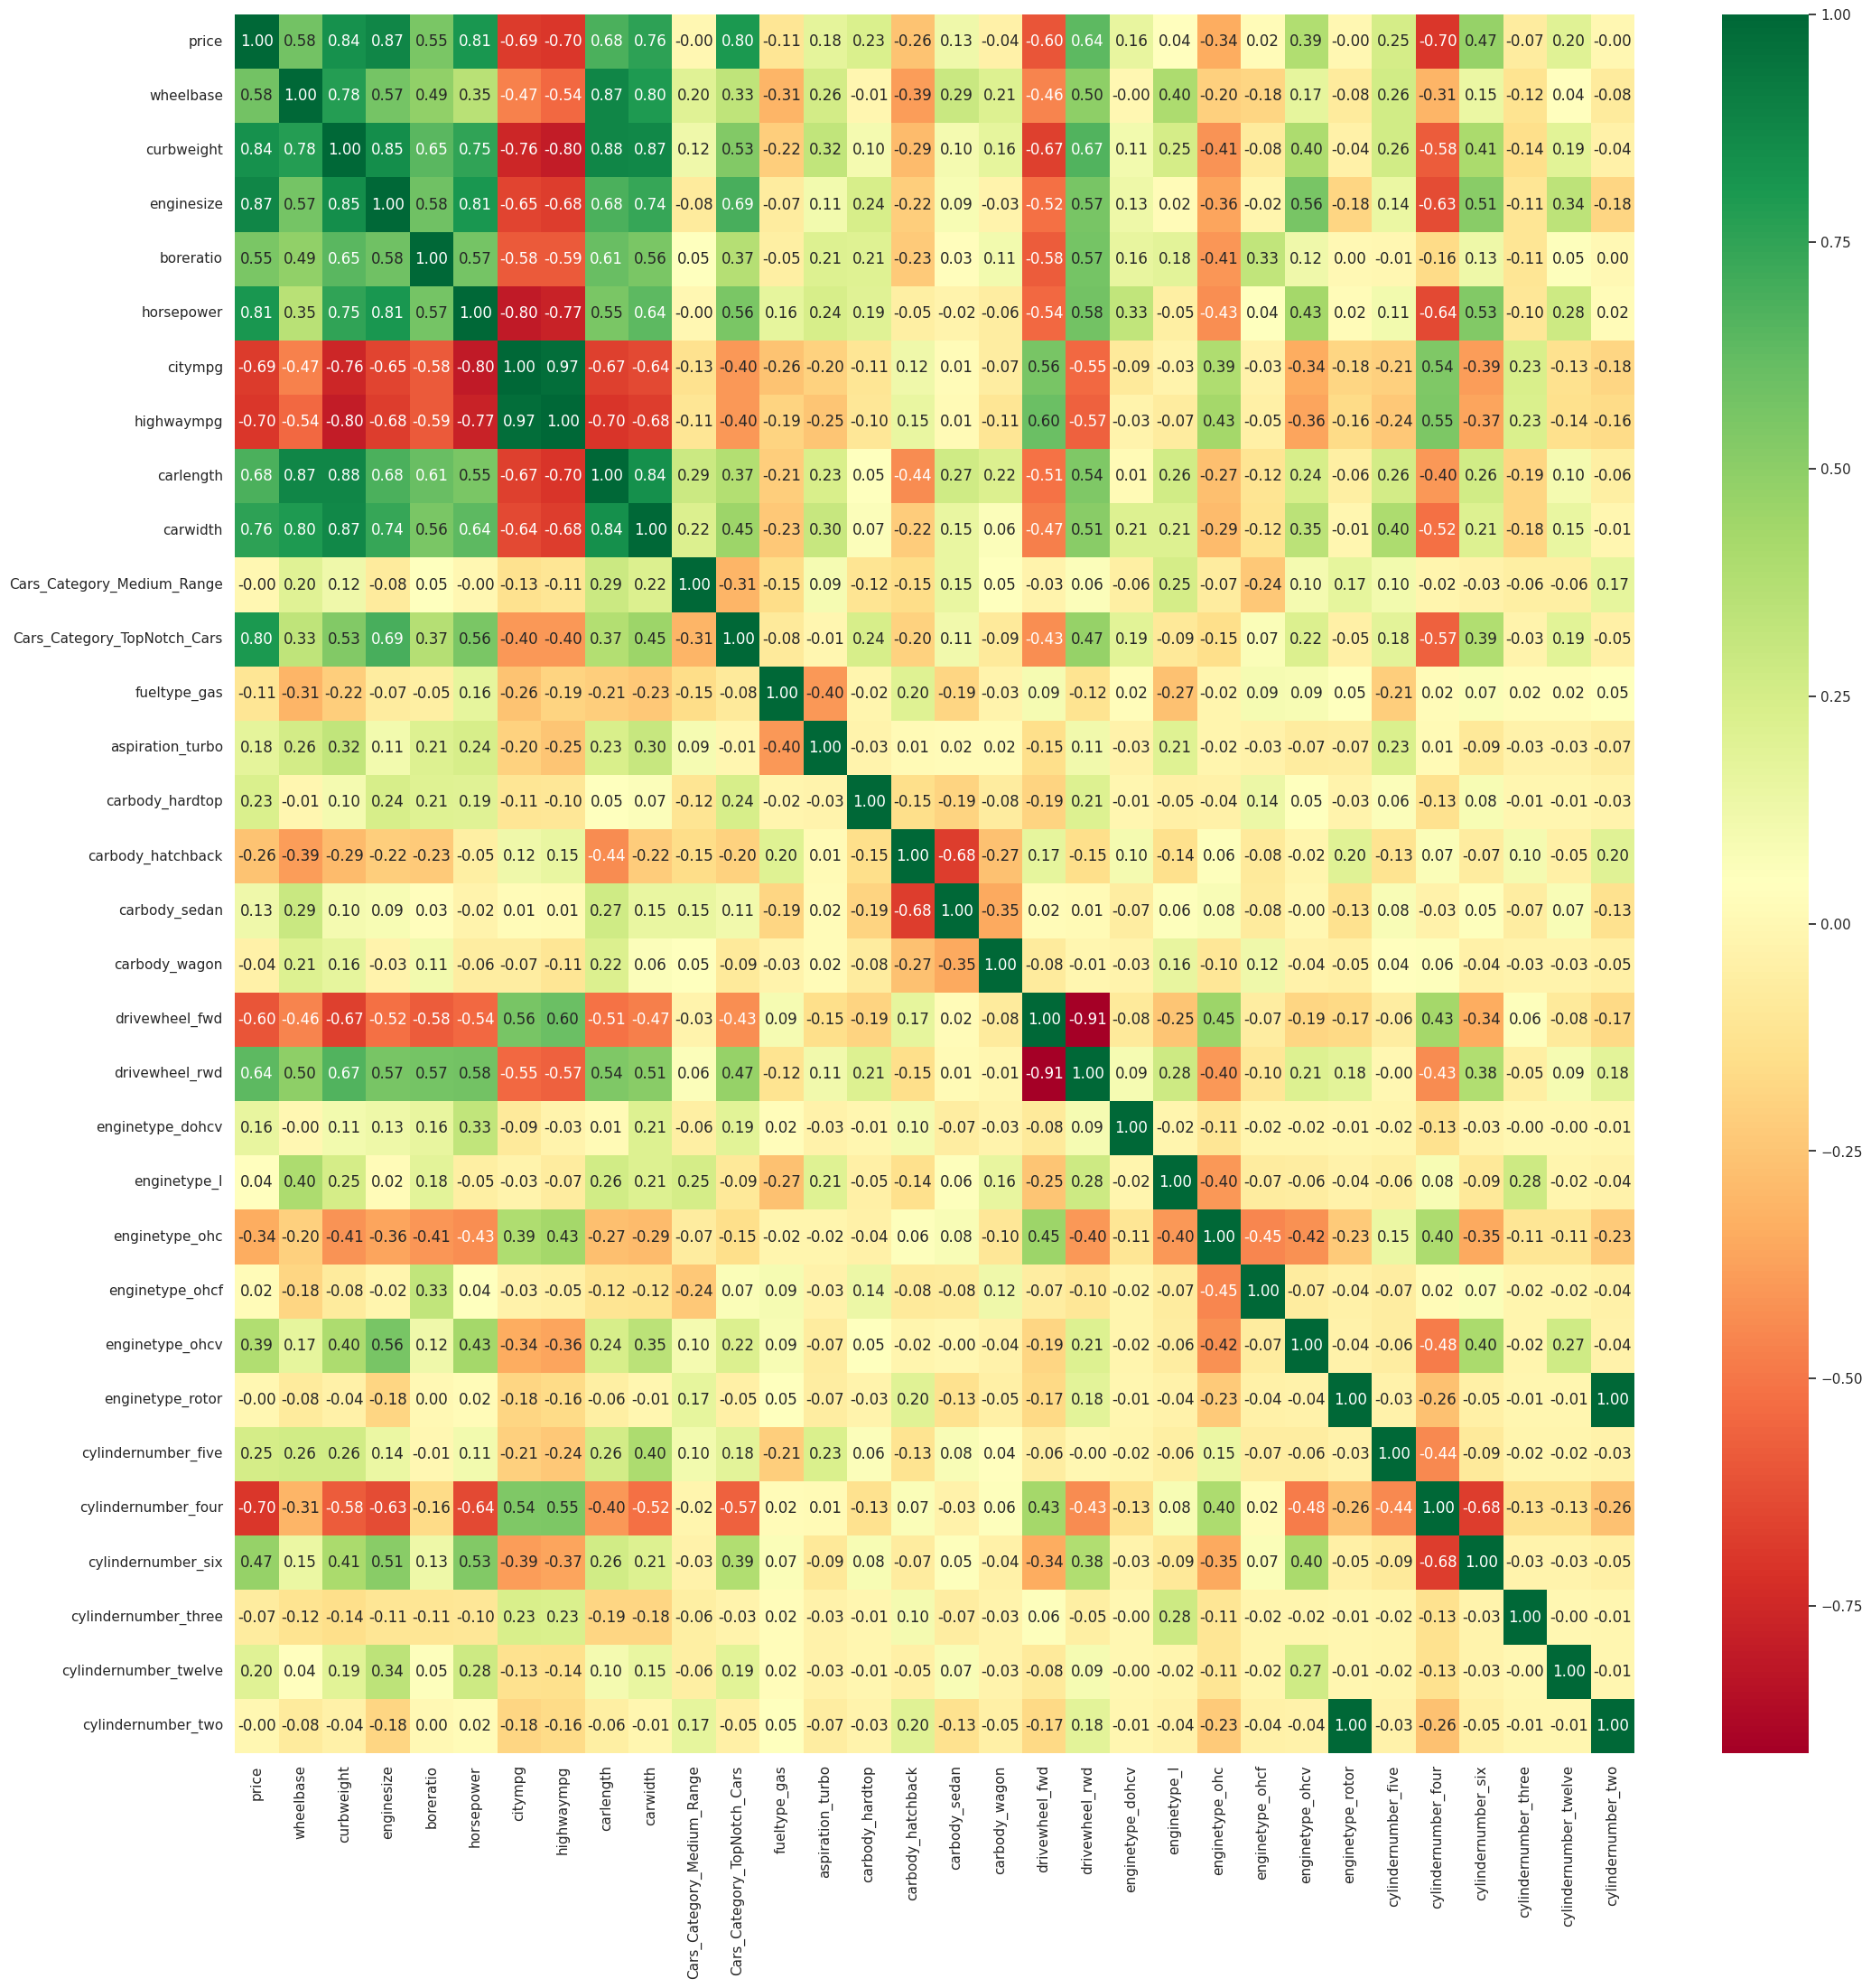

In [48]:
# Let's Check Correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn', fmt = '.2f')
plt.show()

### Modelling

#### Build a linear model

In [49]:
import statsmodels.api as sm
X_train_1 = X_train['horsepower']
X_train_1

125   0.9206 
42    -0.1451
156   -0.8886
136   1.3419 
140   -0.8142
        ...  
106   1.3419 
14    0.3754 
92    -0.9133
179   1.3667 
102   1.1436 
Name: horsepower, Length: 137, dtype: float64

In [50]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)
X_train_1c.head()

,const,horsepower
125,1.0000,0.9206
42,1.0000,-0.1451
156,1.0000,-0.8886
136,1.0000,1.3419
140,1.0000,-0.8142


In [51]:
X_train_1c['const'].value_counts()

1.0000    137
Name: const, dtype: int64

In [52]:
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [53]:
lr_1.params

const        13458.7299
horsepower   6436.6245 
dtype: float64

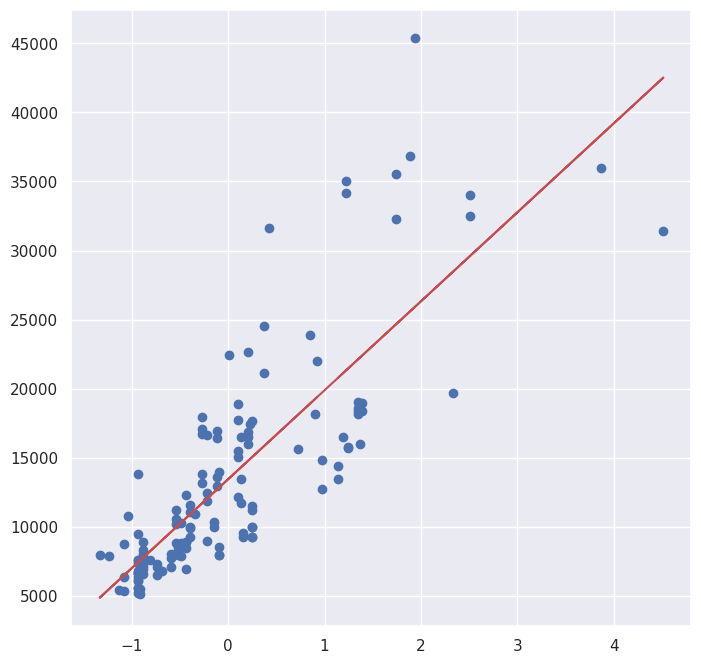

In [54]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 6436.6245*X_train_1c.iloc[:, 1] + 13458.7299, 'r')
plt.show()

In [55]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     266.0
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.02e-33
Time:                        02:00:52   Log-Likelihood:                -1349.4
No. Observations:                 137   AIC:                             2703.
Df Residuals:                     135   BIC:                             2709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.346e+04    394.640     34.104      0.0

##### Adding another variable
* The Adj R-squared value obtained is 0.66. 
* Since we have so many variables, we can clearly do better than this. 
* So let's go ahead and add the other highly correlated variable, i.e. curbweight.

In [56]:
X_train_2 = X_train[['horsepower', 'curbweight']]
X_train_2 = sm.add_constant(X_train_2)
lr_2 = sm.OLS(y_train, X_train_2).fit()
print(lr_2.summary())
print(lr_2.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     252.5
Date:                Sat, 06 May 2023   Prob (F-statistic):           3.56e-46
Time:                        02:00:52   Log-Likelihood:                -1317.0
No. Observations:                 137   AIC:                             2640.
Df Residuals:                     134   BIC:                             2649.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.346e+04    312.652     43.047      0.0

##### Adding another variable
* The Adj R-squared value obtained is 0.787. 
* Since we have so many variables, we can clearly do better than this. 
* So lets add another correlated variable, i.e. enginesize.

In [57]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]
X_train_3 = sm.add_constant(X_train_3)
lr_3 = sm.OLS(y_train, X_train_3).fit()
print(lr_3.summary())
print(lr_3.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     210.7
Date:                Sat, 06 May 2023   Prob (F-statistic):           2.50e-50
Time:                        02:00:52   Log-Likelihood:                -1304.1
No. Observations:                 137   AIC:                             2616.
Df Residuals:                     133   BIC:                             2628.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.346e+04    285.727     47.103      0.0

##### Insights
* We have achieved a R-squared of 0.822 by manually picking the highly correlated variables. 
* Now lets use RFE to select the independent variables which accurately predicts the dependent variable price.

### Feature Selection
##### RFE
Let's use Recursive feature elimination since we have too many independent variables

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
n_features = 15
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select = n_features)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [59]:
pd.DataFrame(zip(X_train.columns, rfe.support_, rfe.ranking_)).sort_values(by = 2).reset_index(drop = True)

,0,1,2
0,carbody_sedan,True,1
1,cylindernumber_six,True,1
2,cylindernumber_four,True,1
3,cylindernumber_five,True,1
4,enginetype_rotor,True,1
5,enginetype_ohcv,True,1
6,enginetype_dohcv,True,1
7,carbody_wagon,True,1
8,cylindernumber_twelve,True,1
9,carbody_hatchback,True,1


In [60]:
# Select the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [61]:
X_train_rfe = X_train[col_sup]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value. Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.

* High p-value High VIF : Drop the variable
* High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
* Low p-value Low VIF : accept the variable

In [62]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.01e-70
Time:                        02:00:52   Log-Likelihood:                -1222.7
No. Observations:                 137   AIC:                             2475.
Df Residuals:                     122   BIC:                             2519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Checking VIF:
* Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. 
* It is an extremely important parameter to test our linear model.

In [63]:
X_train_rfe.head()

,curbweight,horsepower,Cars_Category_TopNotch_Cars,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two
125,0.3757,0.9206,1,0,1,0,0,0,0,0,0,1,0,0,0
42,-0.5489,-0.1451,0,0,0,1,0,0,0,0,0,1,0,0,0
156,-0.9530,-0.8886,0,0,0,1,0,0,0,0,0,1,0,0,0
136,0.4329,1.3419,0,0,1,0,0,0,0,0,0,1,0,0,0
140,-0.6499,-0.8142,0,0,1,0,0,0,0,0,0,1,0,0,0


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame(zip(X_train_rfe.columns, [variance_inflation_factor(X_train_rfe, i) for i in range(X_train_rfe.shape[1])]), columns=['Columns', 'VIF']).sort_values(by='VIF', ascending = False).reset_index(drop = True)

,Columns,VIF
0,enginetype_rotor,inf
1,cylindernumber_two,inf
2,cylindernumber_four,22.0177
3,carbody_sedan,14.5729
4,carbody_hatchback,10.1790
5,horsepower,4.9943
6,carbody_wagon,4.7608
7,cylindernumber_six,4.2536
8,curbweight,3.5119
9,Cars_Category_TopNotch_Cars,2.0639


In [65]:
[i for i in range(X_train_rfe.shape[1])]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [66]:
# enginetype_rotor and cylindernumber_two variables have high vif, so droping them 
# we want p-value less than 0.05 and hence rebuilding the model
X_train_rfe2 = X_train_rfe.drop(columns = ['enginetype_rotor', 'cylindernumber_two'])
X_train_rfec2 = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train,X_train_rfec2).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     161.9
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.01e-70
Time:                        02:00:52   Log-Likelihood:                -1225.5
No. Observations:                 137   AIC:                             2479.
Df Residuals:                     123   BIC:                             2520.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_vif = pd.DataFrame(zip(X_train_rfe2.columns, [variance_inflation_factor(X_train_rfe2, i) for i in range(X_train_rfe2.shape[1])]), columns=['Columns', 'VIF']).sort_values(by='VIF', ascending = False).reset_index(drop = True)
col_vif

,Columns,VIF
0,cylindernumber_four,15.9300
1,carbody_sedan,10.6941
2,carbody_hatchback,6.9794
3,horsepower,4.9117
4,carbody_wagon,3.7155
5,curbweight,3.4937
6,cylindernumber_six,3.4616
7,Cars_Category_TopNotch_Cars,2.0492
8,cylindernumber_five,1.7802
9,carbody_hardtop,1.7717


In [68]:
# enginetype_ohcv and cylindernumber_five variable since p-value is > 0.2, and we want p-value less than 0.05 and hence rebuilding the model
X_train_rfe3 = X_train_rfe2.drop(['enginetype_ohcv', 'cylindernumber_five'], axis = 1)
X_train_rfec3 = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train,X_train_rfec3).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.19e-72
Time:                        02:00:52   Log-Likelihood:                -1226.5
No. Observations:                 137   AIC:                             2477.
Df Residuals:                     125   BIC:                             2512.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_vif = pd.DataFrame(zip(X_train_rfe3.columns, [variance_inflation_factor(X_train_rfe3, i) for i in range(X_train_rfe3.shape[1])]), columns=['Columns', 'VIF']).sort_values(by='VIF', ascending = False).reset_index(drop = True)
col_vif

,Columns,VIF
0,cylindernumber_four,10.1142
1,carbody_sedan,6.3403
2,horsepower,4.8759
3,carbody_hatchback,4.4218
4,curbweight,3.4178
5,carbody_wagon,2.6706
6,cylindernumber_six,2.6338
7,Cars_Category_TopNotch_Cars,2.0419
8,enginetype_dohcv,1.6424
9,carbody_hardtop,1.6161


In [70]:
# Considering only columns havin VIF less than10
col_vif_4 = col_vif.loc[col_vif['VIF']>5]['Columns'].values
col_vif_4

array(['cylindernumber_four', 'carbody_sedan'], dtype=object)

In [71]:
# enginetype_ohcv and cylindernumber_five variable since p-value is > 0.2, and we want p-value less than 0.05 and hence rebuilding the model
X_train_rfe4 = X_train_rfe3.drop(col_vif_4, axis = 1)
X_train_rfec4 = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train,X_train_rfec4).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     183.4
Date:                Sat, 06 May 2023   Prob (F-statistic):           2.59e-68
Time:                        02:00:52   Log-Likelihood:                -1243.2
No. Observations:                 137   AIC:                             2506.
Df Residuals:                     127   BIC:                             2536.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_vif = pd.DataFrame(zip(X_train_rfe4.columns, [variance_inflation_factor(X_train_rfe4, i) for i in range(X_train_rfe4.shape[1])]), columns=['Columns', 'VIF']).sort_values(by='VIF', ascending = False).reset_index(drop = True)
col_vif

,Columns,VIF
0,horsepower,4.4229
1,curbweight,3.3210
2,Cars_Category_TopNotch_Cars,1.8525
3,cylindernumber_six,1.7285
4,enginetype_dohcv,1.5949
5,carbody_hardtop,1.3721
6,cylindernumber_twelve,1.3330
7,carbody_hatchback,1.2366
8,carbody_wagon,1.2216


<b>Now, the VIF and P-value of the model are in desired limits.</b>

### Assumptions of Linear Regression
* Check if the error terms are also normally distributed (which is one of the major assumptions of linear regression).

In [73]:
# Predicting the price of training set.
y_train_price = lm_rfe4.predict(X_train_rfec4)

Skewness: -0.1015076131187331
Kurtosis: 1.8009122426998623


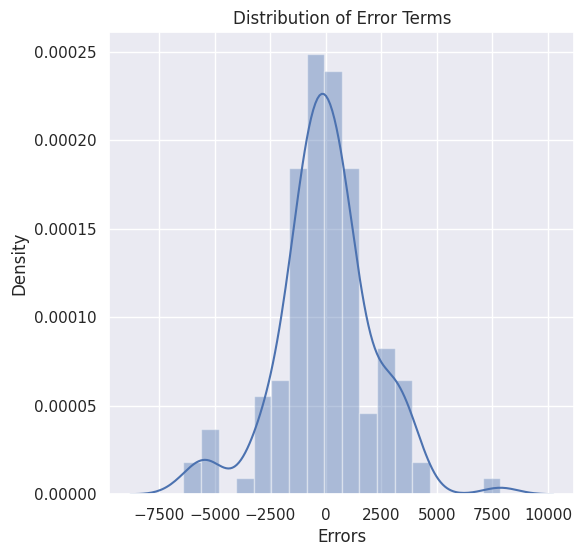

In [78]:
plt.figure(figsize = (6,6))
sns.distplot(y_train_price-y_train)
plt.title('Distribution of Error Terms')
plt.xlabel('Errors')
print('Skewness:', (y_train_price-y_train).skew())
print('Kurtosis:', (y_train_price-y_train).kurt())

### Insights:
* The error terms are not much skewed, and the above distribution is similar to normal distribution. So, we can go ahead with the created model.


In [87]:
X_train_rfec4.head()

,const,curbweight,horsepower,Cars_Category_TopNotch_Cars,carbody_hardtop,carbody_hatchback,carbody_wagon,enginetype_dohcv,cylindernumber_six,cylindernumber_twelve
125,1.0000,0.3757,0.9206,1,0,1,0,0,0,0
42,1.0000,-0.5489,-0.1451,0,0,0,0,0,0,0
156,1.0000,-0.9530,-0.8886,0,0,0,0,0,0,0
136,1.0000,0.4329,1.3419,0,0,1,0,0,0,0
140,1.0000,-0.6499,-0.8142,0,0,1,0,0,0,0


In [89]:
X_test_rfe4 = sm.add_constant(X_test[X_train_rfe4.columns])


In [94]:

y_test_predict = lm_rfe4.predict(X_test_rfe4.values)


### Model Evaluation

In [96]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
print('r2_score:', r2_score(y_test, y_test_predict))
print('mean_absolute_percentage_error:', mean_absolute_percentage_error(y_test, y_test_predict))
print('mean_squared_error:', mean_squared_error(y_test, y_test_predict))


r2_score: 0.8411314891649947
mean_absolute_percentage_error: 0.18145865862994875
mean_squared_error: 10395601.952373507


The R2 score of Training set is 0.92 and Test set is 0.84 which is better. Hence, We can say that our model is genarilized enough to predict the Car prices.